# Medical Insurance Cost Prediction

## Import libraries

In [10]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from sklearn.model_selection import train_test_split
from tensorflow.keras.utils import plot_model

## Get data

In [2]:
data = pd.read_csv("https://raw.githubusercontent.com/stedy/Machine-Learning-with-R-datasets/master/insurance.csv")
data.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [3]:
data.shape

(1338, 7)

## One hot encoding

In [4]:
data = pd.get_dummies(data, drop_first=True)
data.head()

,age,bmi,children,charges,sex_male,smoker_yes,region_northwest,region_southeast,region_southwest
0,19,27.900,0,16884.92400,0,1,0,0,1
1,18,33.770,1,1725.55230,1,0,0,1,0
2,28,33.000,3,4449.46200,1,0,0,1,0
3,33,22.705,0,21984.47061,1,0,1,0,0
4,32,28.880,0,3866.85520,1,0,1,0,0


In [5]:
data.shape

(1338, 9)

## Splitting variables and target

In [6]:
X = data.drop('charges', axis=1)
y = data['charges']

In [7]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((1070, 8), (268, 8), (1070,), (268,))

## Building model 1 (1 dense layer)

In [8]:
model_1 = tf.keras.Sequential([
    tf.keras.layers.Dense(1)
])

model_1.compile(loss=tf.keras.losses.mae,
                optimizer=tf.keras.optimizers.Adam(),
                metrics=['mae'])

history_1 = model_1.fit(X_train, y_train, epochs=200, verbose=0)

##  Model 1 summary

In [9]:
model_1.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 1)                 9         
                                                                 
Total params: 9
Trainable params: 9
Non-trainable params: 0
_________________________________________________________________


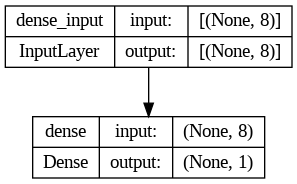

In [11]:
plot_model(model_1, show_shapes=True)

## Evaluate model 1

In [12]:
model_1.evaluate(X_test, y_test)

9/9 [==============================] - 1s 2ms/step - loss: 12498.3447 - mae: 12498.3457


[12498.3447265625, 12498.345703125]

## Predictions suing model 1

In [13]:
y_pred = model_1.predict(X_test)

9/9 [==============================] - 0s 2ms/step


## Plot training curve fro model 1

Text(0.5, 0, 'Epochs')

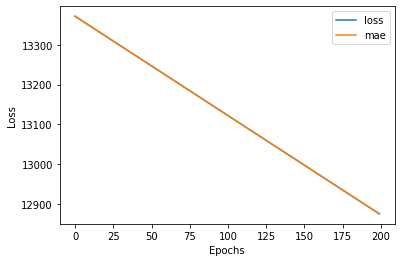

In [19]:
pd.DataFrame(history_1.history).plot()
plt.ylabel('Loss')
plt.xlabel('Epochs')

## Building model 2

In [20]:
model_2 = tf.keras.Sequential([
    tf.keras.layers.Dense(10),
    tf.keras.layers.Dense(1)
])

model_2.compile(loss=tf.keras.losses.mae,
                optimizer=tf.keras.optimizers.Adam(),
                metrics=['mae'])

history_2 = model_2.fit(X_train, y_train, epochs=200, verbose=0)

## Model 2 summary (2 dense layers)

In [21]:
model_2.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_1 (Dense)             (None, 10)                90        
                                                                 
 dense_2 (Dense)             (None, 1)                 11        
                                                                 
Total params: 101
Trainable params: 101
Non-trainable params: 0
_________________________________________________________________


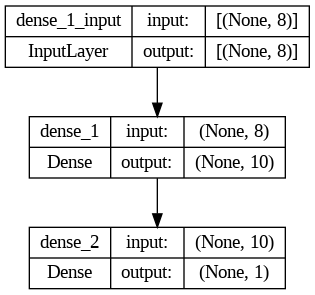

In [22]:
plot_model(model_2, show_shapes=True)

## Predictions using model 2

In [23]:
y_pred_2 = model_2.predict(X_test)

9/9 [==============================] - 0s 2ms/step


## Plotting training curves for model 2

Text(0.5, 0, 'Epochs')

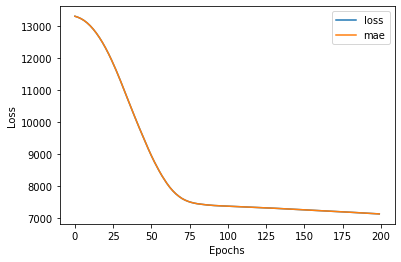

In [24]:
pd.DataFrame(history_2.history).plot()
plt.ylabel('Loss')
plt.xlabel('Epochs')

## Model 2 evaulation

In [25]:
model_2.evaluate(X_test, y_test)

9/9 [==============================] - 0s 2ms/step - loss: 7194.4995 - mae: 7194.4995


[7194.49951171875, 7194.49951171875]

## Building model 3 (3 dense layers)

In [26]:
model_3 = tf.keras.Sequential([
    tf.keras.layers.Dense(100),
    tf.keras.layers.Dense(10),
    tf.keras.layers.Dense(1)
])

model_3.compile(loss=tf.keras.losses.mae,
                optimizer=tf.keras.optimizers.Adam(),
                metrics=['mae'])

history_3 = model_3.fit(X_train, y_train, epochs=200, verbose=0)

## Model 3 summary

In [27]:
model_3.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_3 (Dense)             (None, 100)               900       
                                                                 
 dense_4 (Dense)             (None, 10)                1010      
                                                                 
 dense_5 (Dense)             (None, 1)                 11        
                                                                 
Total params: 1,921
Trainable params: 1,921
Non-trainable params: 0
_________________________________________________________________


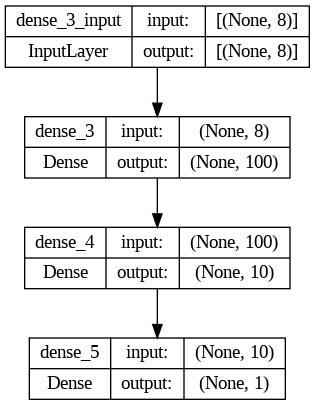

In [28]:
plot_model(model_3, show_shapes=True)

## Predictions using model 3

In [30]:
y_pred_3 = model_3.predict(X_test)

9/9 [==============================] - 0s 3ms/step


## Training curve for model 3

Text(0.5, 0, 'Epochs')

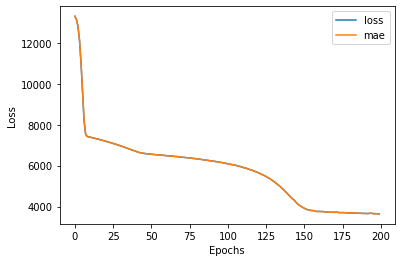

In [31]:
pd.DataFrame(history_3.history).plot()
plt.ylabel('Loss')
plt.xlabel('Epochs')

## Model 3 evaluation

In [33]:
model_3.evaluate(X_test, y_test)

9/9 [==============================] - 1s 7ms/step - loss: 3437.2708 - mae: 3437.2708


[3437.270751953125, 3437.270751953125]

## Save model

In [34]:
model_3.save('model_3')